### 1. What is our independent variable? What is our dependent variable?
* Independent variable: list of words
* Dependent variable: time it takes to read list of words.

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

- Null hypotheses, $H_0$, is there is no difference in the time taken to read in both cases, congruent and incongruent.
- Alternate hypotheses, $H_A$, is time taken to read in both cases are different. This is two-tailed test.
$$H_0 \to \mu_2 - \mu_1 = 0$$
$$H_A \to \mu_2 - \mu_1 \neq 0$$
- We will do **dependent samples t-test** since two samples are related, done on the same population under different conditions.

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [2]:
import math

with open('../datasets/stroopdata.csv') as f:
    data = map(lambda x:x.split(','), f.readlines()[1:]) # skip header row
    congruent = map(lambda x: float(x[0]),data)
    incongruent = map(lambda x: float(x[1]),data)
    
    mu = sum(congruent)/len(congruent)
    std = math.sqrt(sum([(x - mu)**2 for x in congruent])/len(congruent))
    print 'congruent  : mean=%.2f, stddev=%.2f' % (mu, std)
    
    mu = sum(incongruent)/len(incongruent)
    std = math.sqrt(sum([(x - mu)**2 for x in incongruent])/len(incongruent))
    print 'incongruent: mean=%.2f, stddev=%.2f' % (mu, std)

congruent  : mean=14.05, stddev=3.48
incongruent: mean=22.02, stddev=4.70


### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

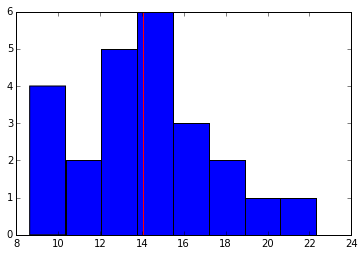

In [3]:
%matplotlib inline
import pylab as P
P.hist(congruent, 8)
P.vlines(14.05,ymin=0,ymax=6,colors='red') # mean

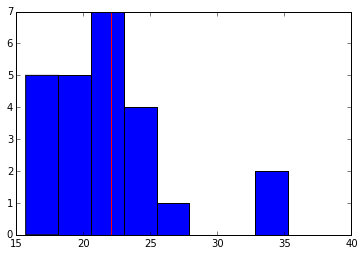

In [4]:
%matplotlib inline
import pylab as P
P.hist(incongruent, 8)
P.vlines(22.02,ymin=0,ymax=7,colors='red') # mean

* **Congruent data** shows bimodal distribution. Frequency between 9 and 10 is higher, however most of the frequency still around mean.
* **incongruent data** shows approximately normal distribution. There are missing data points between 27 and 32. 

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

Formula for repeated measures t-test, for two pre and post samples-

$$t = \frac{\bar{d} - (\mu_1 - \mu_2)}{\frac{S_d}{\sqrt{n}}}$$

* Where
    - $\bar{d}$ = mean of the differences between post(incongruent) and pre(congruent) samples
    - $\mu_1$ and $\mu_2$ are population means of two samples
    - $S_d$ is std dev of difference 
    - $n$ is number of samples (`24` in this example)
    
**Null hypothesis:** There are no differece in the timing of reading in congruent and incongruent test, that mean population mean of both tests are same.
$$H_0 \to \mu_1 = \mu_2$$

**Alternative hypothesis:** Timing of reading in congruent and incongruent test are different.
$$H_A \to \mu_1 \neq \mu_2$$

* According to Null hypothesis $\mu_1 - \mu_2=0$, which makes out $t$ formula as following-
$$t = \frac{\bar{d}}{\frac{S_d}{\sqrt{n}}}$$

* for two-tailed test
$$\alpha \quad level = 0.05$$
$$df = n -1 = 23$$
$$t_{cirtical} = 2.064$$

In [5]:
diff = [i - c for c, i in zip(congruent, incongruent)]
d_bar = sum(diff)/len(diff)
s_d = math.sqrt(sum([(x - d_bar)**2 for x in diff])/len(diff))
t = d_bar / (s_d/math.sqrt(len(diff)))
print "t=%.2f" % t

t=8.19


* $t$ is $8.19$ which is far right from the $t_{critical}$, and we reject the null hypothesis as $p < 0.05$
* $t$ is positive very large than $t_{critical}$, which means timings in incongruent test is very high and subjects took longer read words.

### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

People find it hard to read what color words are written, when word's color is different than word written.